In [1]:
from PIL import Image
import json
import matplotlib.pyplot as plt

from utils import *
from vis_prior_distribution import UniformRandomLocationNoClipVPD
from vis_prior_generator import CannyVisPriorGenerator, VisPriorGenerator

In [2]:
labels_path="/home/ubuntu/dad/roboflow-100-benchmark/rf100/apples-fvpl5/valid/_annotations.coco.json"

In [3]:
with open(labels_path, "r") as f:
    anno = json.load(f)

In [4]:
anno.keys()

dict_keys(['info', 'licenses', 'categories', 'images', 'annotations'])

In [5]:
len(anno["annotations"])

723

In [6]:
anno["annotations"][0]

{'id': 0,
 'image_id': 0,
 'category_id': 2,
 'bbox': [47, 4, 256, 605.5],
 'area': 155008,
 'segmentation': [],
 'iscrowd': 0}

In [7]:
anno["categories"]

[{'id': 0, 'name': 'apples', 'supercategory': 'none'},
 {'id': 1, 'name': 'apple', 'supercategory': 'apples'},
 {'id': 2, 'name': 'damaged_apple', 'supercategory': 'apples'}]

In [8]:
anno["images"][0]

{'id': 0,
 'license': 1,
 'file_name': 'damaged_apple--149-_jpg.rf.005311ca6e5e522e6ebb7c44e4fc9a35.jpg',
 'height': 640,
 'width': 640,
 'date_captured': '2022-07-25T18:57:39+00:00'}

In [9]:
cannyVPG = CannyVisPriorGenerator(vpd=UniformRandomLocationNoClipVPD())

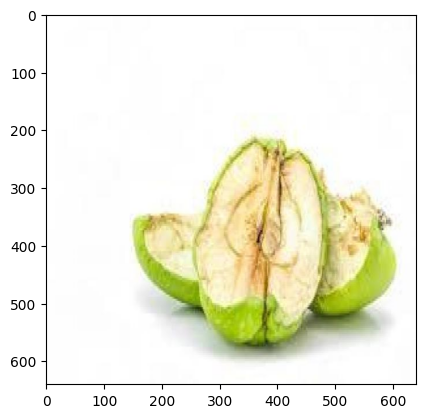

In [10]:
ann_id = 666

img = imread("/home/ubuntu/dad/roboflow-100-benchmark/rf100/apples-fvpl5/valid/"+anno["images"][anno["annotations"][ann_id]['image_id']]['file_name'])
bbox = anno["annotations"][ann_id]['bbox']

plt.imshow(img[:,:,::-1])

(331, 151, 3)


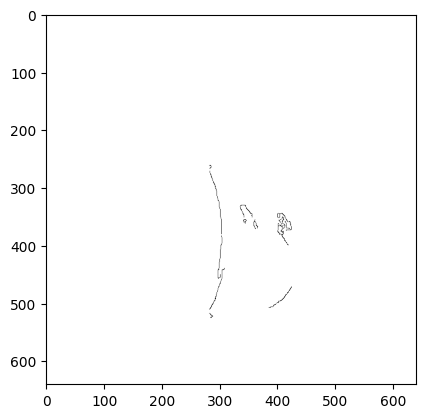

In [11]:

plt.imshow(cannyVPG.generate_one_sample(img=img, bbox=bbox, category_name=None, prior_mode=None, fill_val=0, low=100, high=200, blur=5), cmap='Greys')